<div class="alert alert-block alert-success">
Diabetes is a pressing global health challenge, affecting millions worldwide. Early prediction and intervention can significantly improve patient outcomes and reduce complications. This project harnesses the capabilities of [neural networks](https://en.wikipedia.org/wiki/Artificial_neural_network), to predict diabetes outcomes based on various medical predictor variables.

# Motivation:
With the increasing prevalence of [diabetes](https://www.paho.org/en/topics/diabetes#:~:text=Diabetes%20is%20a%20chronic%2C%20metabolic,%2C%20eyes%2C%20kidneys%20and%20nerves.), there's a dire need for advanced predictive models that can provide timely and accurate predictions. By understanding the intricate relationships between various medical predictors and diabetes outcomes, healthcare professionals can tailor interventions and treatments more effectively.

# Objective:
The primary goal of this project is to develop an neural network-based model that can accurately predict *diabetes outcomes* (`1`indicates that the person has diabetes, `0` indicates that the person does not have diabetes). Through data exploration, preprocessing, feature engineering, and model development, we aim to uncover the hidden relationships between medical predictor variables and diabetes outcomes. The insights derived from this analysis can significantly impact patient care and diabetes management strategies.

# Research questions:
- How can neural networks be utilized to predict diabetes outcomes based on medical predictor variables?
- What insights can be derived from the relationship between these features and diabetes outcomes?
</div>

# Data Cleaning and Exploration:

In [1]:
# We import some useful libraries:
import matplotlib.pyplot as plt # Provides data structures and operations for manipulating numeric arrays.
import seaborn as sns # Python data visualization library based on matplotlib.
import pandas as pd # Provides data structures and operations for manipulating numeric arrays.
import numpy as np # Intended to manipulate matrices or multidimensional arrays.

# We read the dataset:
df = pd.read_csv('diabetes.csv')

# To display the first few rows of the dataset:
print(df.head())

print("-" * 100)

# To get a summary of the dataset:
df.info()

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    ------------

In [2]:
# There's not missing values, but in case you want to check:
# missing_values = df.isnull().sum()
# print("Missing values for each feature:\n", missing_values)

In [3]:
# Removing duplicates:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


So far, there are not missing values or duplicates that may affect the model's performance. We will continue then with the EDA.

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

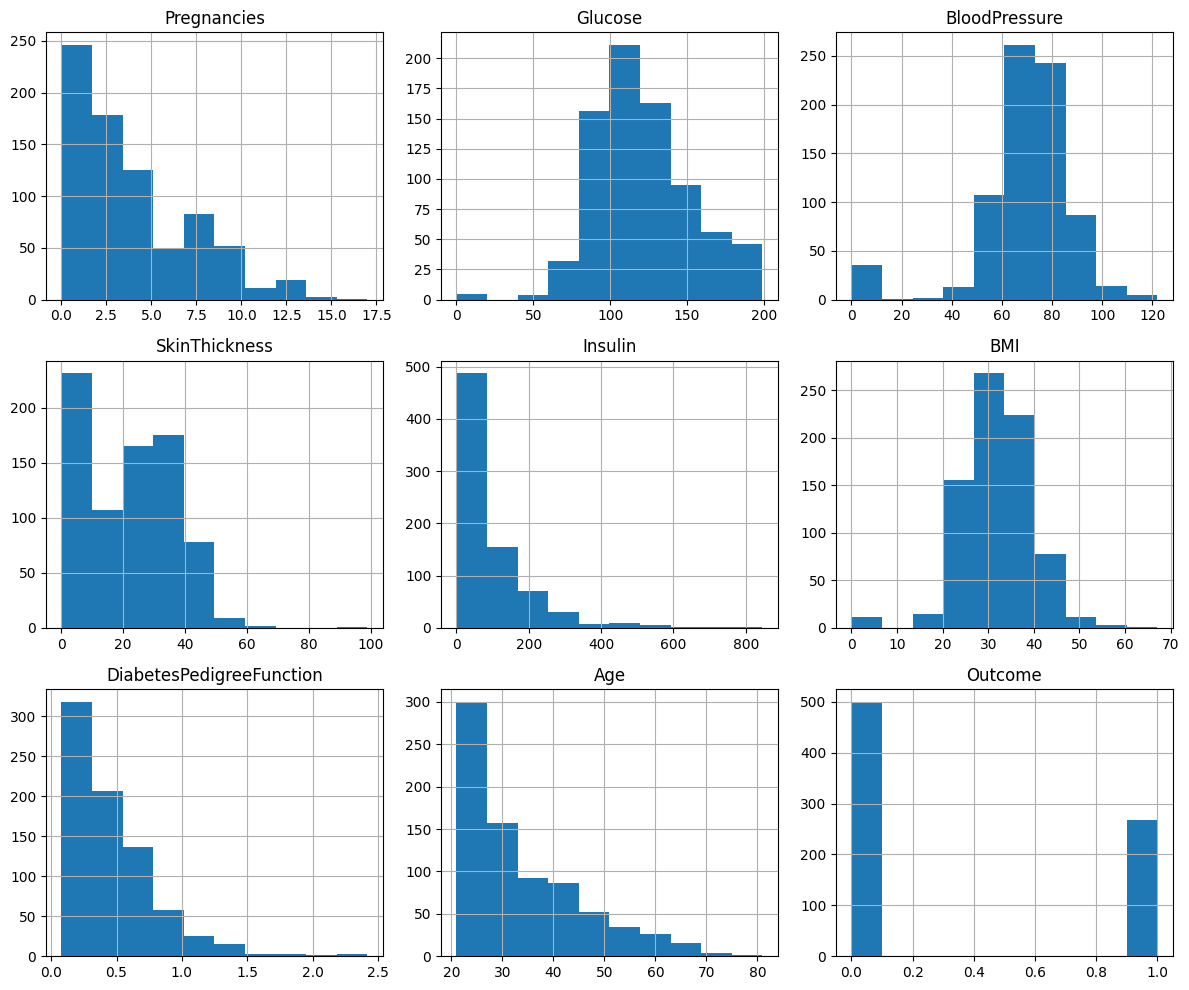

----------------------------------------------------------------------------------------------------


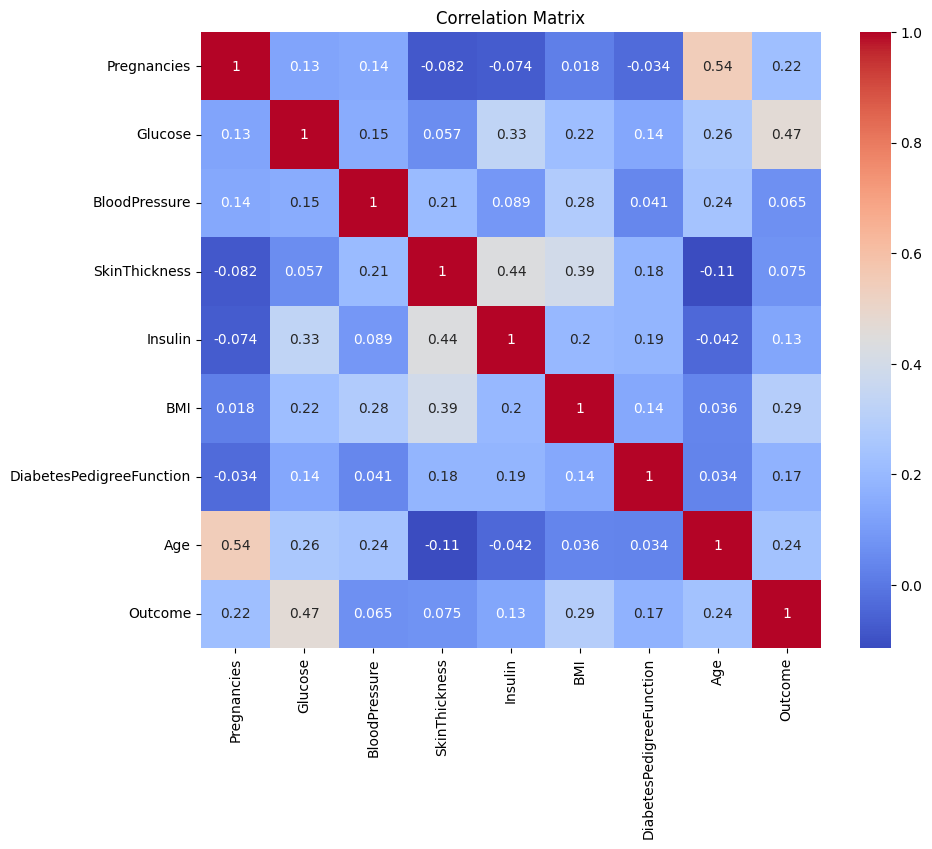

----------------------------------------------------------------------------------------------------


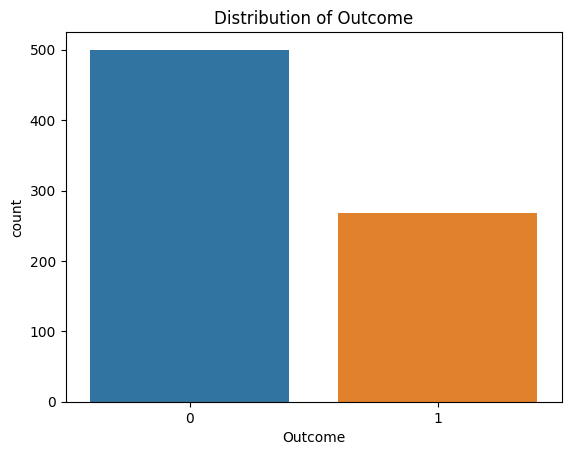

In [4]:
# Pre-EDA:

# Summary Statistics
print(df.describe()) # Method to get a summary of the dataset's statistics.

print("-" * 100)

# Feature Distributions
df.hist(figsize=(12, 10)) # Plot histograms or density plots for each feature to understand its distribution.
plt.tight_layout()
plt.show()

print("-" * 100)

# Correlation Analysis
corr_matrix = df.corr() # Compute the correlation matrix to understand the relationships between features.
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

print("-" * 100)

# Outcome Distribution
sns.countplot(x='Outcome', data=df) # Visualize the distribution of Outcome as a target variable.
plt.title('Distribution of Outcome')
plt.show()

### Extra: Programmatically classify the distributions
We will classify the skewness of a distribution based on the mean, median, and mod (this is just for me to have a control way to classify and not just based on what I see). [In general](http://homepage.stat.uiowa.edu/~rdecook/stat1010/notes/Section_4.2_distribution_shapes.pdf):

- Symmetric: When the mean is approximately equal to the median (and mode).
- Skewed Right (or "Positively Skewed"): When the mean is greater than the median (and mode).
- Skewed Left (or "Negatively Skewed"): When the mean is less than the median (and mode).
- Bimodal or Multimodal: When there are two or more peaks in the distribution.

In [5]:
def classify_distribution(df):
    classifications = {}
    
    for column in df.columns: # Metrics:
        mean = df[column].mean()
        median = df[column].median()
        mode = df[column].mode().iloc[0]  # Taking the first mode in case of multimodal distributions.
        
        if abs(mean - median) < 0.1 * abs(mean):  # Allowing a 10% tolerance.
            classifications[column] = "Symmetric"
        elif mean > median and mean > mode:
            classifications[column] = "Skewed Right (or 'Positively Skewed')"
        elif mean < median and mean < mode:
            classifications[column] = "Skewed Left (or 'Negatively Skewed')"
        else:
            classifications[column] = "Complex or Multimodal"  # For distributions that don't fit the above criteria.
    
    # Specifically for 'Outcome' feature since detecting bimodality programmatically can be tricky.
    unique_values = df['Outcome'].unique()
    if len(unique_values) == 2 and 0 in unique_values and 1 in unique_values:
        classifications['Outcome'] = "Bimodal (Binary values 0 and 1)"
    
    return classifications

distribution_classifications = classify_distribution(df)
for feature, classification in distribution_classifications.items():
    print(f"{feature}: {classification}")

Pregnancies: Skewed Right (or 'Positively Skewed')
Glucose: Symmetric
BloodPressure: Symmetric
SkinThickness: Complex or Multimodal
Insulin: Skewed Right (or 'Positively Skewed')
BMI: Symmetric
DiabetesPedigreeFunction: Skewed Right (or 'Positively Skewed')
Age: Skewed Right (or 'Positively Skewed')
Outcome: Bimodal (Binary values 0 and 1)


In [6]:
# We continue to summarize the outputs to don't depend only in the visual part:
def get_relevant_correlations(df, target='Outcome', top_n=5):
    correlation_matrix = df.corr()
    
    # Extract correlations related to the target variable (outputs):
    correlations = correlation_matrix[target].drop(target)
    
    # Get the top_n most positively correlated features:
    most_positively_correlated = correlations.sort_values(ascending=False).head(top_n)
    
    # Get the top_n most negatively correlated features:
    most_negatively_correlated = correlations.sort_values(ascending=True).head(top_n)
    
    return most_positively_correlated, most_negatively_correlated

positive_correlations, negative_correlations = get_relevant_correlations(df)

print("Most Positively Correlated Features with 'Outcome':")
print(positive_correlations)
print("\nMost Negatively Correlated Features with 'Outcome':")
print(negative_correlations)

Most Positively Correlated Features with 'Outcome':
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Name: Outcome, dtype: float64

Most Negatively Correlated Features with 'Outcome':
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
DiabetesPedigreeFunction    0.173844
Pregnancies                 0.221898
Name: Outcome, dtype: float64


## EDA: Feature distributions

Let's dig deeper into the Pregnancies, the SkinThickness (seems it seems complex), and the Insulin. We want to know if the higher values and if they are [outliers](https://en.wikipedia.org/wiki/Outlier).

In [7]:
from scipy.stats import zscore

<div class="alert alert-block alert-warning">
The **Z-score** [standard score](https://en.wikipedia.org/wiki/Standard_score), represents the number of standard deviations a given data point is from the mean of a set of data. It provides a measure of how far away a particular value is from the average value in a dataframe, relative to the variability of the data. A positive Z-score indicates that the data point is above the mean, while a negative Z-score indicates it's below the mean:

$Z = \frac{X - \mu}{\sigma}$,

where:
- Z is the Z-score
- X is the value of the data point
- $\mu$ is the mean of the dataset
- $\sigma$ is the standard deviation of the dataset.
</div>

In [8]:
# Function to detect outliers based on Z-score:
def detect_outliers(dataframe, column):
    threshold = 3 # According to the Empirical Rule 99.7% of data following a normal distribution lies within 3 SD.
    outliers = []
    z_scores = zscore(dataframe[column])
    for i, z in enumerate(z_scores):
        if abs(z) > threshold:
            outliers.append(i)
    return outliers

# Detecting outliers positions for 'Pregnancies', 'SkinThickness', and 'Insulin':
outliers_pregnancies = detect_outliers(df, 'Pregnancies')
outliers_skinthickness = detect_outliers(df, 'SkinThickness')
outliers_insulin = detect_outliers(df, 'Insulin')

outliers_pregnancies, outliers_skinthickness, outliers_insulin

([88, 159, 298, 455],
 [579],
 [8,
  13,
  111,
  153,
  186,
  220,
  228,
  247,
  286,
  370,
  409,
  415,
  486,
  584,
  645,
  655,
  695,
  753])

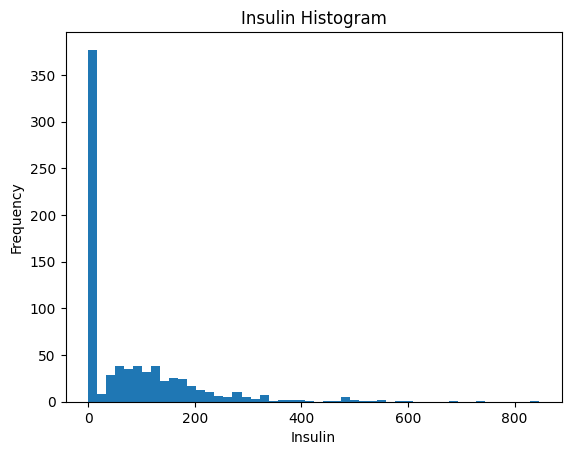

In [9]:
# Let's plot quickly the insulin one since I believe it has missing values.
plt.hist(df['Insulin'], bins=50)
plt.title('Insulin Histogram')
plt.xlabel('Insulin')
plt.ylabel('Frequency')
plt.show()

In [10]:
# Yup.
# Count the number of zero values in the Insulin column
num_zero_insulin = (df['Insulin'] == 0).sum()
num_zero_insulin

374

A large peak at 0 in the Insulin histogram could indicate missing or unrecorded measurements rather than actual zero insulin levels. It's unlikely for a large number of individuals to have an insulin level of exactly zero, especially in a dataset related to diabetes.

I would take the simplest approach (replacing zeros with the median) and then evaluating the model's performance. 

In [11]:
# Calculate the median of the non-zero insulin values:
insulin_median = df[df['Insulin'] != 0]['Insulin'].median()

# Replace zero insulin values with the median:
df['Insulin'].replace(0, insulin_median, inplace=True)

# Display the first few rows of the dataframe to confirm the change:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,125,33.6,0.627,50,1
1,1,85,66,29,125,26.6,0.351,31,0
2,8,183,64,0,125,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


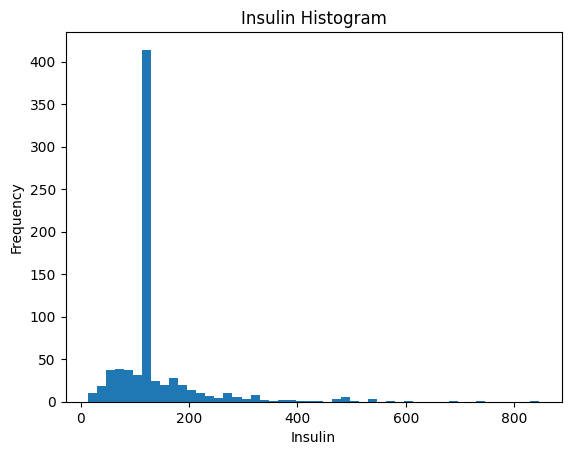

In [12]:
plt.hist(df['Insulin'], bins=50)
plt.title('Insulin Histogram')
plt.xlabel('Insulin')
plt.ylabel('Frequency')
plt.show()

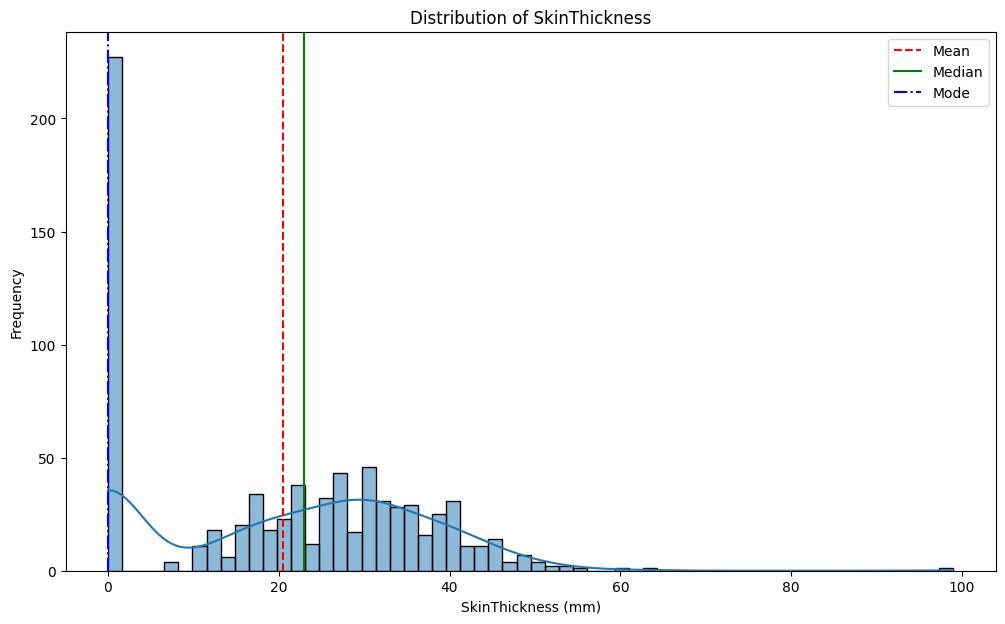

In [13]:
# Plotting SkinThickness to understand its distribution
plt.figure(figsize=(12, 7))
sns.histplot(df['SkinThickness'], kde=True, bins=60)
plt.title('Distribution of SkinThickness')
plt.xlabel('SkinThickness (mm)')
plt.ylabel('Frequency')
plt.axvline(df['SkinThickness'].mean(), color='r', linestyle='--', label='Mean')
plt.axvline(df['SkinThickness'].median(), color='g', linestyle='-', label='Median')
plt.axvline(df['SkinThickness'].mode()[0], color='b', linestyle='-.', label='Mode')
plt.legend()
plt.show()

In [14]:
# Displaying additional statistics:
df['SkinThickness'].describe()

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

In [15]:
# Print the value of SkinThickness for row 579 (must be the 99):
print(df.loc[579, 'SkinThickness'])

99


In [16]:
# Higher value:
# Get the highest value for each specified column
highest_pregnancies = df['Pregnancies'].max()
highest_skinthickness = df['SkinThickness'].max()
highest_insulin = df['Insulin'].max()

print(f"Highest value in Pregnancies: {highest_pregnancies}")
print(f"Highest value in SkinThickness: {highest_skinthickness}")
print(f"Highest value in Insulin: {highest_insulin}")

Highest value in Pregnancies: 17
Highest value in SkinThickness: 99
Highest value in Insulin: 846


<div class="alert alert-block alert-info">
For the Pregnancies, the highest value is 17. While this number is high, it's not impossible. The outliers detected are relatively few, and they are likely individuals who have been pregnant many times. In the case of insulin, the normal values for a 2-Hour serum insulin (mu U/ml) can vary depending on the specific laboratory, testing method used, and age. The outliers detected might represent individuals with particularly high insulin levels or who are on insulin therapy.

Now, the large peak near 0 in the SkinThickness distribution is concerning. According to this [reference](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9127233/#:~:text=In%20the%20study%20population%2C%20the,vs%2014.3%20±%206.8%20mm)., the average TSF thickness was 18.7 ± 8.5 mm. Also, women have much higher TSF thickness than men (23.6 ± 7.5 mm vs 14.3 ± 6.8 mm). In a medical context, a skin thickness of 0 is not plausible and likely represents missing or unrecorded data. The presence of a value like 99 mm might be an outlier or an extreme value in the dataset. Our classification of SkinThickness as "Complex or Multimodal" is accurate given what was observed.

In the context of neural network models, the quality and preprocessing of data are crucial. Features dominated by constant values, such as zeros, can affect the model's ability to learn effectively. While one approach could be to substitute these zero values with a representative statistic, like the median, to maintain the feature while minimizing the noise, I lack medical expertise and will need to research more about the SkinThickness. Given this, my inclination would be to omit this particular feature from the model.
</div>

In [17]:
df.drop('SkinThickness', axis=1, inplace=True)
print("-" * 100)
df.info()

----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 70.2 KB


## EDA: Correlation Analysis

Glucose is the most positively correlated feature with the outcome. We will visualize the distribution to see if there's a clear threshold or pattern. On the ohter side, we will explore BMI, Age, and BloodPreassure.

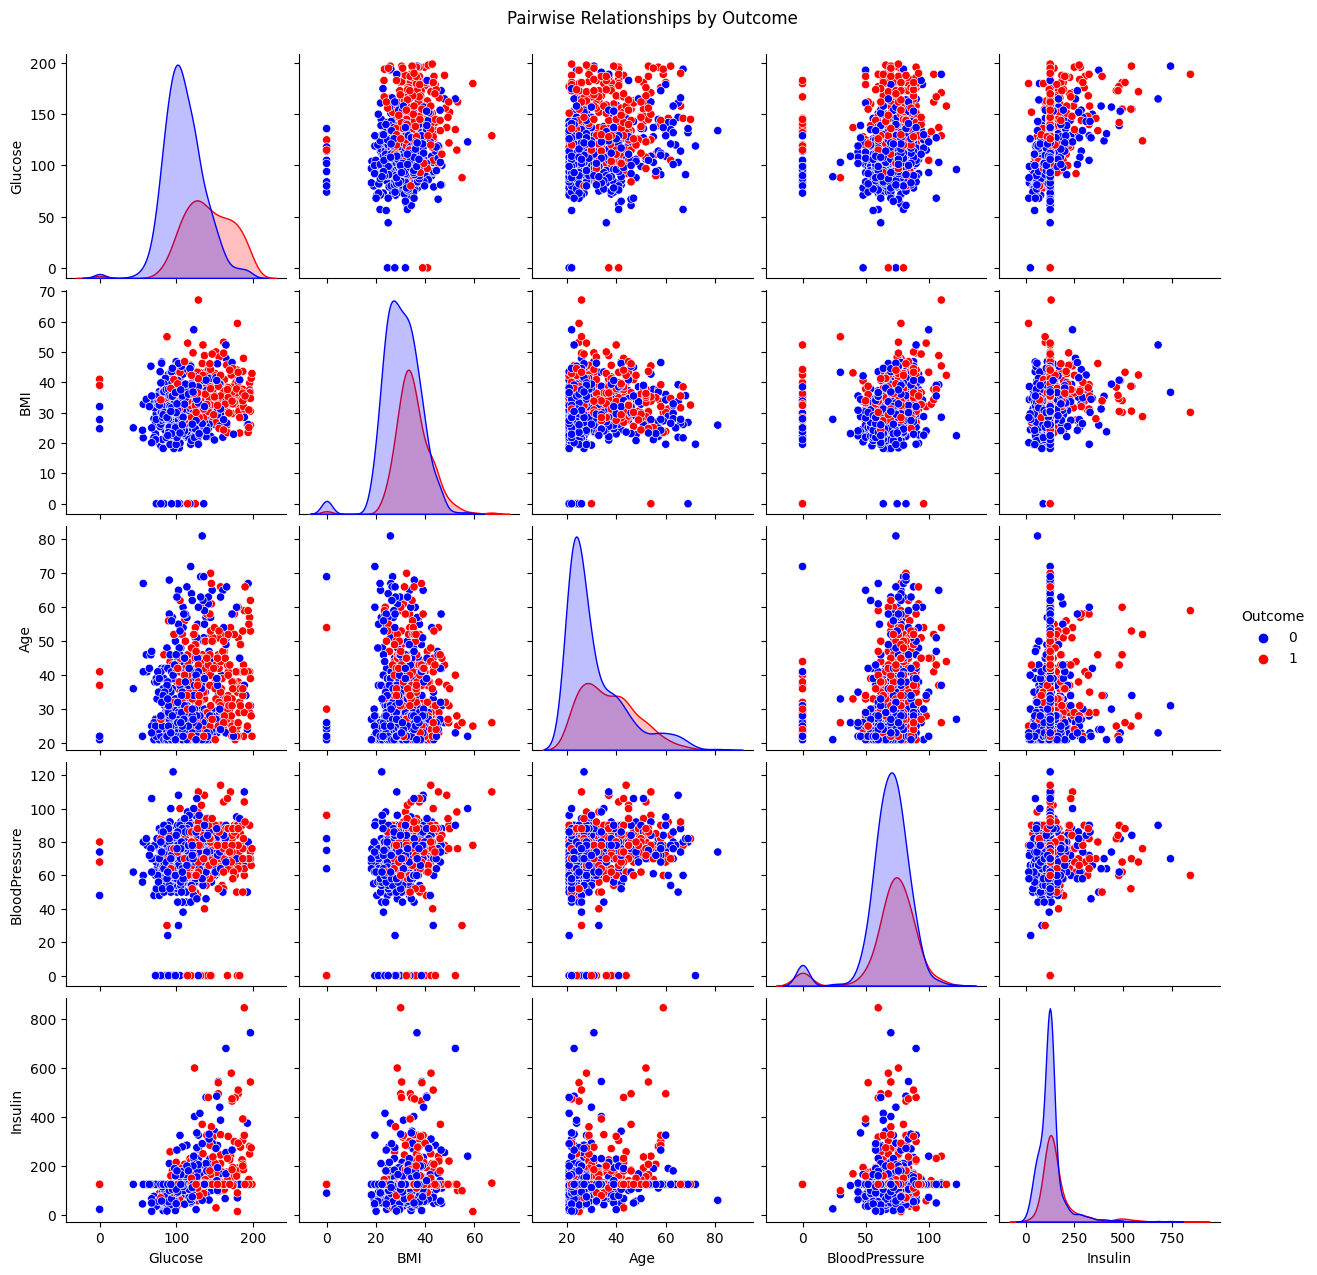

In [18]:
# List:
features = ['Glucose', 'BMI', 'Age', 'BloodPressure', 'Insulin']

# Pairplot:
sns.pairplot(df, hue='Outcome', vars=features, palette={0: 'blue', 1: 'red'})
plt.suptitle('Pairwise Relationships by Outcome', y=1.02)
plt.show()

C:\Users\dafda\AppData\Local\Temp\ipykernel_15392\3855907157.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Outcome'] == 0][feature], ax=axs[i, 0], shade=True, color='lightblue', label='Non-Diabetic')
C:\Users\dafda\AppData\Local\Temp\ipykernel_15392\3855907157.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Outcome'] == 1][feature], ax=axs[i, 0], shade=True, color='lightcoral', label='Diabetic')
C:\Users\dafda\AppData\Local\Temp\ipykernel_15392\3855907157.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Outcome'] == 0][feature], ax=axs[i, 0], shade=True, color='lightblue', label='Non-Dia

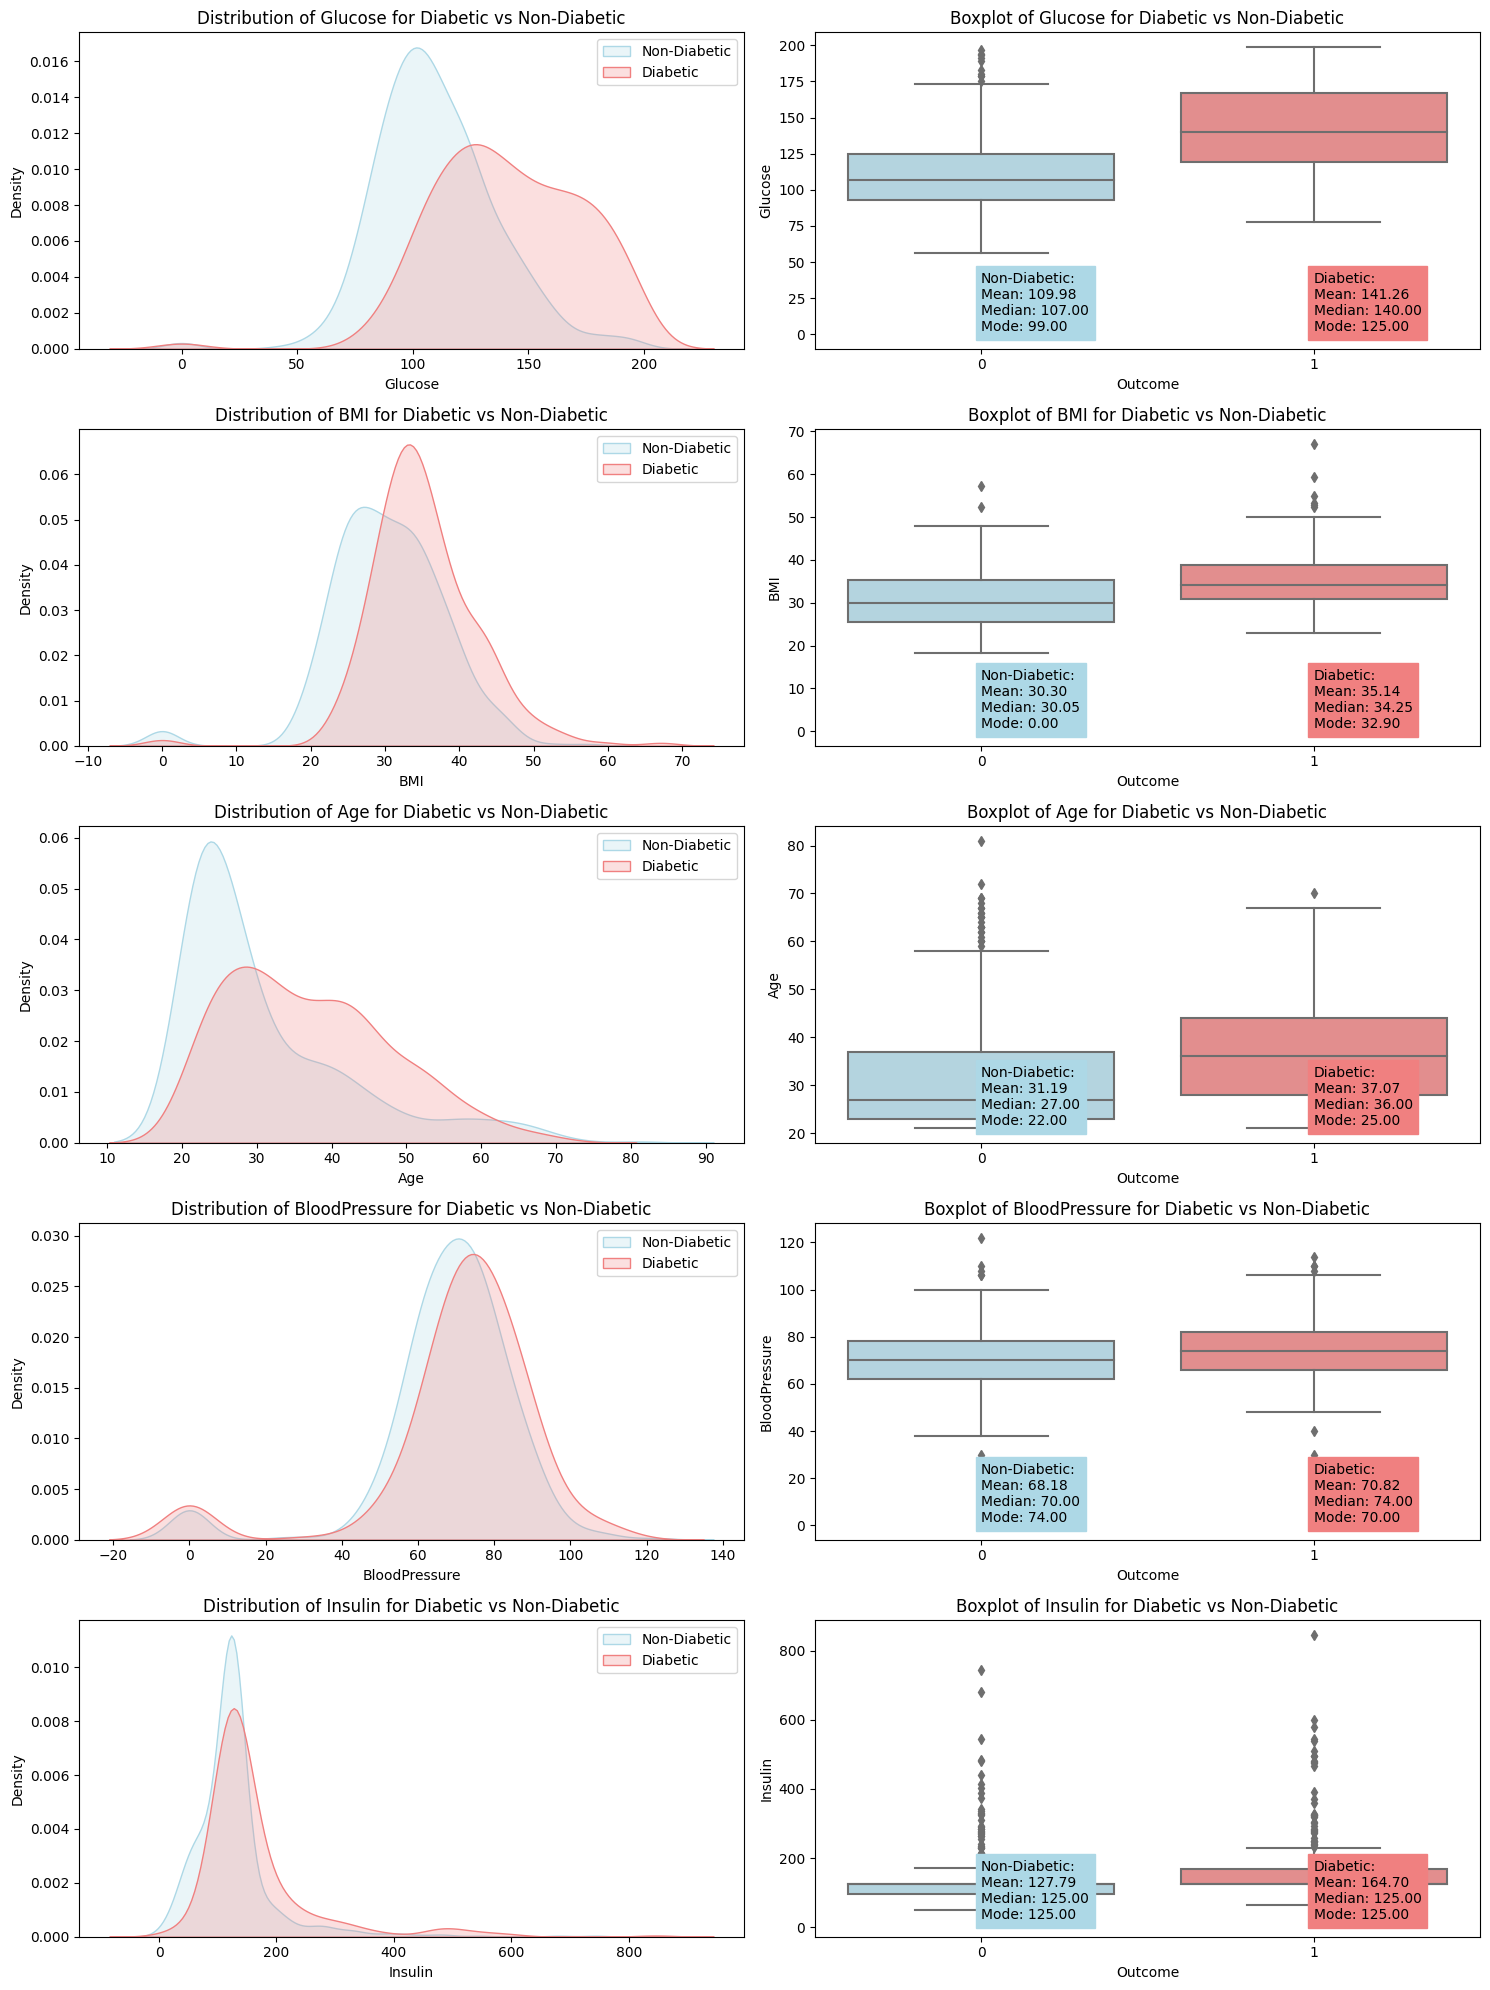

In [19]:
# Setting up the figure and axes:
fig, axs = plt.subplots(nrows=len(features), ncols=2, figsize=(15, 20))

# Looping through each feature to create the plots:
for i, feature in enumerate(features):
    # Distribution plot for each feature
    sns.kdeplot(df[df['Outcome'] == 0][feature], ax=axs[i, 0], shade=True, color='lightblue', label='Non-Diabetic')
    sns.kdeplot(df[df['Outcome'] == 1][feature], ax=axs[i, 0], shade=True, color='lightcoral', label='Diabetic')
    axs[i, 0].set_title(f'Distribution of {feature} for Diabetic vs Non-Diabetic')
    axs[i, 0].legend()
    
# Box plot for each feature:
    sns.boxplot(x='Outcome', y=feature, data=df, ax=axs[i, 1], palette=['lightblue', 'lightcoral'])
    axs[i, 1].set_title(f'Boxplot of {feature} for Diabetic vs Non-Diabetic')
    
    # Calculating statistics for the legend box
    mean_0 = df[df['Outcome'] == 0][feature].mean()
    median_0 = df[df['Outcome'] == 0][feature].median()
    mode_0 = df[df['Outcome'] == 0][feature].mode().get(0, np.nan)
    
    mean_1 = df[df['Outcome'] == 1][feature].mean()
    median_1 = df[df['Outcome'] == 1][feature].median()
    mode_1 = df[df['Outcome'] == 1][feature].mode().get(0, np.nan)
    
    # Creating the legend box for non-diabetic group
    legend_text_0 = f"Non-Diabetic:\nMean: {mean_0:.2f}\nMedian: {median_0:.2f}\nMode: {mode_0:.2f}"
    axs[i, 1].text(0, df[feature].min(), legend_text_0, backgroundcolor='lightblue', verticalalignment='bottom')
    
    # Creating the legend box for diabetic group
    legend_text_1 = f"Diabetic:\nMean: {mean_1:.2f}\nMedian: {median_1:.2f}\nMode: {mode_1:.2f}"
    axs[i, 1].text(1, df[feature].min(), legend_text_1, backgroundcolor='lightcoral', verticalalignment='bottom')

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
In examining the plots, we observe distinct patterns in the data:

- *Glucose Levels*: Individuals diagnosed with diabetes (represented in red) generally exhibit elevated glucose levels compared to those without the condition (blue).
- *Insulin levels*: Given the context (and the importance) of Insulin, I took the median imputation approach. However, it's crucial to acknowledge the limitations of it. The presence of many outliers in the Insulin feature, both before and after imputation, suggests that the distribution of this feature is skewed or has a wide range. After imputation, it appears that the number of outliers increased. This might be because the distribution has become even more skewed with the addition of many median values. More sophisticated imputation methods, like [KNN imputation](https://medium.com/@kyawsawhtoon/a-guide-to-knn-imputation-95e2dc496e) or model-based imputation, might provide better estimates than the median. However, they come with their own assumptions and complexities so I will let them for future analysis.
- *BMI*: A similar trend is evident in BMI values, where those with diabetes tend to have higher readings. **However**, there's a noticeable overlap between the two groups, suggesting other factors at play.
- *Ag*e: The age distribution indicates that diabetes is more prevalent among older individuals. Yet, it's worth noting the presence of younger individuals with diabetes and older ones without.
- *Blood Pressure*: This metric doesn't present a clear distinction between the two groups, suggesting it might not be a primary indicator in this dataset.
- *Inter-feature Relationships*: The *scatter plots* reveal relationships between certain features. For instance, age and blood pressure, as well as BMI and blood pressure, appear positively correlated. High blood pressure, or hypertension, is a major health problem that is common in older adults. Also, BMI is a risk factor for hypertension. Interestingly, these correlations seem consistent regardless of diabetes status. While these features might be correlated, they don't necessarily predict diabetes on their own.
</div>

### Extra: t-test
<div class="alert alert-block alert-warning">
We will perform [t-test](https://www.investopedia.com/terms/t/t-test.asp) to determine if the mean of features like Glucose, BMI, Age, and Blood Pressure are statistically different between the two outcome groups.

The t-test is a statistical test used to determine if there is a significant difference between the means of two groups. It is based on the t-distribution, which is similar to the normal distribution but varies based on the number of observations. We will perform the **two-sample t-test**, used to compare the means of two independent groups. We are assuming that the data points of the Outcome are independent of each other.

The basic idea behind the t-test is to determine if the observed differences between the means of two groups are statistically significant or if they could have occurred by random chance.

When we perform a t-test, we get a p-value. The p-value tells us the probability of observing a difference as extreme as the one we have (or more extreme) if there was no actual difference in the population. A small p-value (typically ≤ 0.05) indicates that the observed difference is statistically significant.
</div>

In [20]:
from scipy.stats import ttest_ind

# Let's split the data into two groups based on the Outcome column:
group1 = df[df['Outcome'] == 0]  # Non-diabetic group
group2 = df[df['Outcome'] == 1]  # Diabetic group

# List of features to test:
featuresTTest = ['Glucose', 'BMI', 'Age', 'BloodPressure']

# Perform t-test for each feature:
results = {}
for feature in featuresTTest:
    t_stat, p_val = ttest_ind(group1[feature], group2[feature])
    results[feature] = (t_stat, p_val)

# Restuls:
for feature, (t_stat, p_val) in results.items():
    print(f"Feature: {feature}")
    print(f"t-statistic: {t_stat:.4f}")
    print(f"p-value: {p_val:.4f}")
    print("-" * 40)

Feature: Glucose
t-statistic: -14.6001
p-value: 0.0000
----------------------------------------
Feature: BMI
t-statistic: -8.4718
p-value: 0.0000
----------------------------------------
Feature: Age
t-statistic: -6.7927
p-value: 0.0000
----------------------------------------
Feature: BloodPressure
t-statistic: -1.8047
p-value: 0.0715
----------------------------------------


<div class="alert alert-block alert-info">
About the results:

- *Glucose*: The p-value is less than the common alevel of 0.05. This indicates that there is a statistically significant difference in the mean glucose levels between the diabetic and non-diabetic groups. The negative t-statistic suggests that the mean glucose level for the diabetic group is higher than the non-diabetic group. We can verify this with our previous plots.
- *BMI*: The p-value is, again, indicating a statistically significant difference in the mean BMI values between the two groups. The negative t-statistic suggests that the mean BMI for the diabetic group is higher than the non-diabetic group. We can verify this with our previous plots.
- *Age*: The p-value is zero, showing a statistically significant difference in the mean age between the diabetic and non-diabetic groups. The negative t-statistic indicates that the mean age for the diabetic group is higher than the non-diabetic group. We can verify this with our previous plots.
- *Blood Pressure*: The p-value is 0.0715, which is greater than 0.05. This suggests that there isn't a statistically significant difference in the mean blood pressure between the two groups. This is also reflect in our previous plots and interpretations.

We can see that elevated glucose levels are a clear indicator of diabetes. This aligns with medical knowledge, as high blood sugar is a defining characteristic of diabetes. Now, while individuals with diabetes tend to have higher BMI values, there's a significant overlap between the two groups. This suggests that while BMI might be a **risk factor**, it's not the sole determinant. Other factors, possibly genetic, could also play a role.

Older age seems to be associated with a higher risk of diabetes. However, the presence of younger individuals with diabetes indicates that age alone isn't a definitive factor. We will explore this futher.

Blood pressure doesn't seem to be a primary indicator of diabetes in this dataset. While there's a relationship between age, BMI, and blood pressure, it doesn't distinctly separate diabetic and non-diabetic individuals.
</div>

# Feature engineering

Let's start by creating the `Age_Category` feature. We'll define the age groups as follows:

- Young: Age <= 40
- Middle-aged: 40 < Age <= 60
- Senior: Age > 60

We'll visualize the distribution of diabetes across these age categories using a suitable plot.

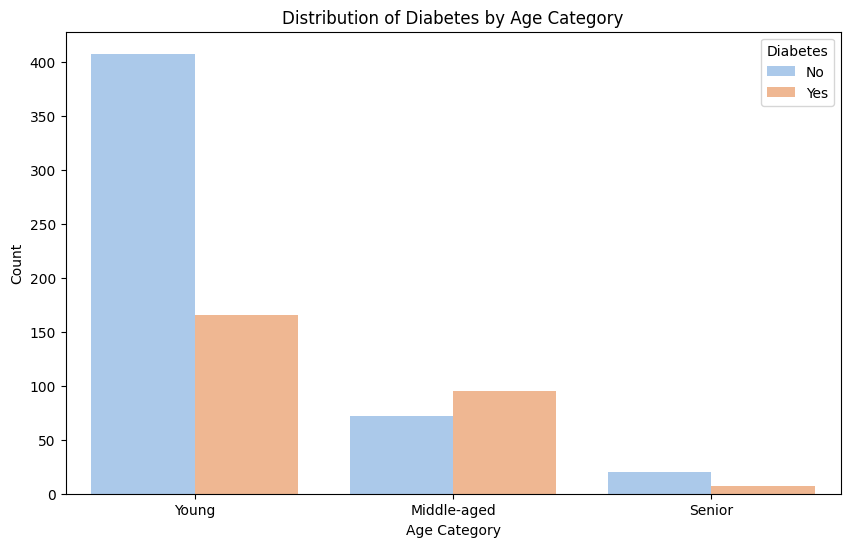

In [21]:
# Create the Age_Category feature
df['Age_Category'] = pd.cut(df['Age'], bins=[0, 40, 60, 120], labels=['Young', 'Middle-aged', 'Senior'])

# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Age_Category', hue='Outcome', palette='pastel')
plt.title('Distribution of Diabetes by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.legend(title='Diabetes', labels=['No', 'Yes'])
plt.show()

# Neural Networks Model Development

## Relevant Features:
<div class="alert alert-block alert-success">
As observed, elevated glucose levels are a clear indicator of diabetes. This feature is crucial for the model. On the other side, although there's an overlap between diabetic and non-diabetic groups, BMI can still be a significant risk factor and should be included too.  Finally, age has shown a relationship with diabetes, and its categorization into 'Young', 'Middle-aged', and 'Senior' might capture non-linear relationships.  Since Age_Category is a categorical feature, we'll convert it into a format suitable for the neural network.

BloodPressure might be less directly indicative based on the current analysis.
</div>

## Model Training and Evaluation

We'll use a [Feedforward Neural Network (FNN)](https://en.wikipedia.org/wiki/Feedforward_neural_network). It's a type of artificial neural network where connections between nodes do not form a cycle (data flows in one direction, without looping). The main components are:

- *Input Layer*: Represents the input features. This is the first layer that receives the input data. 
- *Hidden Layers*: One or more layers that transform the input data. They help in capturing complex patterns in the data.
- *Output Layer*: Produces the final prediction. We are doing in this problem a **binary classification** task.

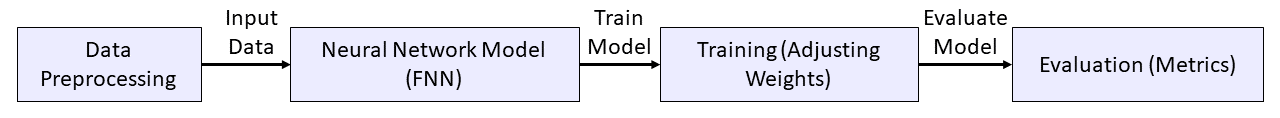


### Extra: Activation Functions

Activation functions introduce non-linearity into the network, allowing it to learn from error and make adjustments, which is essential for learning complex patterns.

- ReLU (Rectified Linear Unit):$f(x)=max(0,x)$. It replaces all negative values with zero and leaves positive values unchanged. Simple and efficient.
- Sigmoid: $f(x)=\dfrac{1}{1+e^{-x}}$. It outputs values between 0 and 1.

In [22]:
#!pip install -q keras

In [23]:
#!pip install tensorflow

In [24]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from keras.models import Sequential
from keras.layers import Dense

In [25]:
# One-hot encode the 'Age_Category': Format that can be provided to the neural network. Each category is a binary vector.
encoder = OneHotEncoder()
encoded_age = encoder.fit_transform(df[['Age_Category']]).toarray()

# Get the feature names after fitting:
feature_names = encoder.get_feature_names_out(['Age_Category'])

age_df = pd.DataFrame(encoded_age, columns=feature_names)
df = pd.concat([df, age_df], axis=1)

# Selecting relevant features and target:

X = df[['Glucose', 'BMI', 'Insulin', 'Age_Category_Young', 'Age_Category_Middle-aged', 'Age_Category_Senior']]
y = df['Outcome'] # Target.

# Splitting the dataset:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80-20 split.

# Standardize the features:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building the neural network architecture:
model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], activation='relu')) # Input layer with 12 neurons and ReLU activation.
model.add(Dense(8, activation='relu')) # Hidden layer with 8 neurons and ReLU activation.
model.add(Dense(1, activation='sigmoid')) # Output layer with 1 neuron and sigmoid activation.

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model:
model.fit(X_train, y_train, epochs=150, batch_size=10)

# Evaluating the model:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Epoch 1/150
62/62 [==============================] - 1s 2ms/step - loss: 0.6975 - accuracy: 0.5765
Epoch 2/150
62/62 [==============================] - 0s 2ms/step - loss: 0.6320 - accuracy: 0.6694
Epoch 3/150
62/62 [==============================] - 0s 2ms/step - loss: 0.5834 - accuracy: 0.6661
Epoch 4/150
62/62 [==============================] - 0s 2ms/step - loss: 0.5505 - accuracy: 0.6954
Epoch 5/150
62/62 [==============================] - 0s 2ms/step - loss: 0.5304 - accuracy: 0.7182
Epoch 6/150
62/62 [==============================] - 0s 2ms/step - loss: 0.5175 - accuracy: 0.7492
Epoch 7/150
62/62 [==============================] - 0s 2ms/step - loss: 0.5075 - accuracy: 0.7590
Epoch 8/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4990 - accuracy: 0.7508
Epoch 9/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4933 - accuracy: 0.7541
Epoch 10/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4894 - accuracy: 0.7541
Epoch 11/

62/62 [==============================] - 0s 2ms/step - loss: 0.4256 - accuracy: 0.7980
Epoch 84/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4269 - accuracy: 0.7850
Epoch 85/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4269 - accuracy: 0.7964
Epoch 86/150
62/62 [==============================] - 0s 3ms/step - loss: 0.4248 - accuracy: 0.7932
Epoch 87/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4235 - accuracy: 0.7980
Epoch 88/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4239 - accuracy: 0.7964
Epoch 89/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4233 - accuracy: 0.7964
Epoch 90/150
62/62 [==============================] - 0s 3ms/step - loss: 0.4233 - accuracy: 0.7899
Epoch 91/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4230 - accuracy: 0.7915
Epoch 92/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4232 - accuracy: 0.7883
Epoch 93/150


<div class="alert alert-block alert-info">
    
**Accuracy** measures the proportion of correct predictions out of all predictions made. An accuracy of 0.7338 means that the model correctly predicted the outcome for approximately 74.68% of the instances in the test set. On the other hand. precision measures the proportion of true positive predictions out of all positive predictions made. A **precision** of 0.6296 means that out of all the instances the model predicted as positive, approximately 64.81% were actually positive. High precision indicates that false positives (instances incorrectly predicted as positive) are low.

**Recall** (sensitivity or true positive rate), measures the proportion of actual positives that were correctly predicted by the model. A recall of 0.636 means that the model correctly identified approximately 63.63% of all the actual positive instances. High recall indicates that false negatives (actual positives that the model failed to identify) are low.

The **F1 score** is the harmonic mean of precision and recall. An F1 score of 0.642 suggests that the model has a reasonably balanced precision and recall, but there's room for improvement.

Thus, the model has a decent accuracy of 74.68%, meaning it gets about 3 out of 4 predictions right. Also, it is suggested that the model is reasonably good at predicting positive instances but also makes a fair number of mistakes in terms of false positives and false negatives. The F1 score is also in the 62% range, indicating a balanced performance but with room for improvement.
</div>

## Hyperparameter Tuning

Hyperparameter tuning is the process of finding the best set of hyperparameters for a machine learning model. In the context of neural networks, hyperparameters include the number of layers, number of neurons in each layer, learning rate, batch size, etc.

Let's experiment a bit adding more hidden layers and neurons in each layer.

In [27]:
# Building the neural network architecture:
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu')) # Input layer with 12 neurons and ReLU activation.
model.add(Dense(12, activation='relu')) # Hidden layer with 8 neurons and ReLU activation.
model.add(Dense(1, activation='sigmoid')) # Output layer with 1 neuron and sigmoid activation.

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model:
model.fit(X_train, y_train, epochs=150, batch_size=10)

# Evaluating the model:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Epoch 1/150
62/62 [==============================] - 1s 2ms/step - loss: 0.6430 - accuracy: 0.6547
Epoch 2/150
62/62 [==============================] - 0s 2ms/step - loss: 0.5559 - accuracy: 0.7020
Epoch 3/150
62/62 [==============================] - 0s 2ms/step - loss: 0.5133 - accuracy: 0.7541
Epoch 4/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4869 - accuracy: 0.7769
Epoch 5/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4740 - accuracy: 0.7785
Epoch 6/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4677 - accuracy: 0.7818
Epoch 7/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4650 - accuracy: 0.7801
Epoch 8/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4594 - accuracy: 0.7948
Epoch 9/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4579 - accuracy: 0.7948
Epoch 10/150
62/62 [==============================] - 0s 3ms/step - loss: 0.4557 - accuracy: 0.7899
Epoch 11/

62/62 [==============================] - 0s 2ms/step - loss: 0.4151 - accuracy: 0.8013
Epoch 84/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4144 - accuracy: 0.8078
Epoch 85/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4129 - accuracy: 0.7964
Epoch 86/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4146 - accuracy: 0.8078
Epoch 87/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4149 - accuracy: 0.8062
Epoch 88/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4118 - accuracy: 0.8094
Epoch 89/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4126 - accuracy: 0.8029
Epoch 90/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4137 - accuracy: 0.8078
Epoch 91/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4114 - accuracy: 0.8094
Epoch 92/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4122 - accuracy: 0.8062
Epoch 93/150


Let's concentrate first in batch size and use adam optimization.

In [ ]:
#!pip install keras-tuner

In [28]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

# To define the architecture of the neural network:
def build_model(hp):
    model = keras.Sequential()
    # We will turn the # neurons in the input, the # hidden layers, the # neutrons in each hidden layer.
    model.add(layers.Dense(units=hp.Int('input_units', min_value=8, max_value=32, step=4),
                           activation='relu', input_dim=X_train.shape[1]))
    
    for i in range(hp.Int('n_layers', 1, 4)):  # adding layers
        model.add(layers.Dense(units=hp.Int(f'conv_{i}_units', min_value=8, max_value=32, step=4),
                               activation='relu'))
    
    # We turn the learning rate for the Adam optimizer.
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

tuner = RandomSearch( #Randomly samples from the hyperparameter space and evaluates the model with each set.
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='random_search',
    project_name='diabetes'
)

tuner.search_space_summary()

# Start the search for the best hyperparameters. It trains the model with different sets of hyperparameters and evaluates.
tuner.search(X_train, y_train,
             epochs=5,
             validation_data=(X_test, y_test))

# Get the optimal hyperparameters:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('input_units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

Trial 5 Complete [00h 00m 07s]
val_accuracy: 0.7683982451756796

Best val_accuracy So Far: 0.7683982451756796
Total elapsed time: 00h 00m 35s

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 8 and the optimal learning rate for the optimizer
is 0.01.



In [30]:
# The first time I did this:

model = Sequential()
model.add(Dense(24, input_dim=X_train.shape[1], activation='relu'))  # Input layer with 24 neurons and ReLU activation.
model.add(Dense(12, activation='relu'))  # Hidden layer with 12 neurons and ReLU activation.
model.add(Dense(1, activation='sigmoid'))  # Output layer with 1 neuron and sigmoid activation.

optimizer = Adam(learning_rate=0.001)

model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

model.fit(X_train, y_train, epochs=150, batch_size=10)

y_pred = (model.predict(X_test) > 0.5).astype("int32")

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Epoch 1/150
62/62 [==============================] - 1s 2ms/step - loss: 0.6059 - accuracy: 0.7394
Epoch 2/150
62/62 [==============================] - 0s 2ms/step - loss: 0.5386 - accuracy: 0.7687
Epoch 3/150
62/62 [==============================] - 0s 2ms/step - loss: 0.5017 - accuracy: 0.7671
Epoch 4/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4859 - accuracy: 0.7687
Epoch 5/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4802 - accuracy: 0.7736
Epoch 6/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4726 - accuracy: 0.7818
Epoch 7/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4682 - accuracy: 0.7850
Epoch 8/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4651 - accuracy: 0.7801
Epoch 9/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4621 - accuracy: 0.7866
Epoch 10/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4585 - accuracy: 0.7801
Epoch 11/

62/62 [==============================] - 0s 2ms/step - loss: 0.4186 - accuracy: 0.7948
Epoch 84/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4180 - accuracy: 0.8013
Epoch 85/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4186 - accuracy: 0.7915
Epoch 86/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4185 - accuracy: 0.7997
Epoch 87/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4181 - accuracy: 0.7948
Epoch 88/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4167 - accuracy: 0.7980
Epoch 89/150
62/62 [==============================] - 0s 3ms/step - loss: 0.4175 - accuracy: 0.7932
Epoch 90/150
62/62 [==============================] - 0s 3ms/step - loss: 0.4168 - accuracy: 0.7997
Epoch 91/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4161 - accuracy: 0.7980
Epoch 92/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4165 - accuracy: 0.7932
Epoch 93/150


In [29]:
# Let's modify based in last optimization:
from tensorflow.keras.optimizers import Adam

# Neural network architecture:
model = Sequential()
model.add(Dense(8, input_dim=X_train.shape[1], activation='relu'))  # Input layer with 8 neurons and ReLU activation.
model.add(Dense(12, activation='relu'))  # Hidden layer with 12 neurons and ReLU activation.
model.add(Dense(1, activation='sigmoid'))  # Output layer with 1 neuron and sigmoid activation.

# Using the optimal learning rate for the Adam optimizer:
optimizer = Adam(learning_rate=0.01) # Updated learning rate to 0.01 as per the new result.

model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Training the model:
model.fit(X_train, y_train, epochs=150, batch_size=10)

# Evaluating the model:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Epoch 1/150
62/62 [==============================] - 1s 2ms/step - loss: 0.5246 - accuracy: 0.7687
Epoch 2/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4880 - accuracy: 0.7866
Epoch 3/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4775 - accuracy: 0.7736
Epoch 4/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4729 - accuracy: 0.7850
Epoch 5/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4727 - accuracy: 0.7687
Epoch 6/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4708 - accuracy: 0.7834
Epoch 7/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4644 - accuracy: 0.7736
Epoch 8/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4675 - accuracy: 0.7752
Epoch 9/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4661 - accuracy: 0.7785
Epoch 10/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4575 - accuracy: 0.7915
Epoch 11/

62/62 [==============================] - 0s 2ms/step - loss: 0.4155 - accuracy: 0.8111
Epoch 84/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4134 - accuracy: 0.7997
Epoch 85/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4149 - accuracy: 0.7932
Epoch 86/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4059 - accuracy: 0.7997
Epoch 87/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4198 - accuracy: 0.7801
Epoch 88/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4141 - accuracy: 0.7915
Epoch 89/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4106 - accuracy: 0.8078
Epoch 90/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4161 - accuracy: 0.7964
Epoch 91/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4195 - accuracy: 0.7997
Epoch 92/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4164 - accuracy: 0.8046
Epoch 93/150


<div class="alert alert-block alert-danger">
(I used the keras turned with the build_model function many times, but the kernel was restarted so I don't have all the outputs.)

For 24 input and 0.001 learning rate: The hyperparameter tuning has led to an improvement in the model's performance. In this case, the optimized model seems to be a better general-purpose model.

However, after multiple trials and evaluations (with learning rates of 0.01 or more input layers), it became evident that the improvements were not as consistent as initially perceived. While the model remains a competent general-purpose classifier, the hyperparameter tuning did not consistently yield significant performance enhancements for all trials. This variability underscores the importance of repeated evaluations and the inherent complexities of neural network optimization. It's possible that the model is already near its optimal performance given the current data and architecture, and further hyperparameter tuning might only lead to marginal or inconsistent gains.
</div>

## Model Validation: Cross-Validation

[Cross-validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics)#:~:text=Cross-validation%20is%20a%20resampling,model%20will%20perform%20in%20practice.) is a resampling technique used to evaluate machine learning models on a limited data sample. The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=10 becoming 10-fold cross-validation.

We will perform 10-fold cross-validation on our dataset using the neural network model. The results will give us a more robust estimate of our model's performance.

In [ ]:
#!pip install scikeras

In [31]:
from sklearn.model_selection import cross_val_score
from scikeras.wrappers import KerasClassifier

def create_model():
    model = Sequential()
    model.add(Dense(24, input_dim=X_train.shape[1], activation='relu')) # As per the optimal units you found
    model.add(Dense(12, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
    return model

# Wrap the model using KerasClassifier:
model = KerasClassifier(build_fn=create_model, epochs=150, batch_size=10, verbose=0)

# 10-fold cross-validation:
kfold_scores = cross_val_score(model, X_train, y_train, cv=10)

print(f"Mean Accuracy: {kfold_scores.mean()}")
print(f"Standard Deviation: {kfold_scores.std()}")

C:\Users\dafda\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dafda\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dafda\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dafda\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which poi

Mean Accuracy: 0.7702009518773135
Standard Deviation: 0.052269782933473126


<div class="alert alert-block alert-info">
The cross-validation mean accuracy suggests that, on average, the model correctly classifies about 77.02% of the instances. This is a more reliable estimate than the single train-test split accuracy because it's based on multiple splits of the data. The single train-test split gave an accuracy of 74.03%, which is within the range of performances observed during cross-validation (mean ± standard deviation). This means that the single split result was not an outlier but a plausible performance metric for this model on this dataset.

Our validation confirms that the model's performance in the single train-test split was not just due to chance or a particularly favorable split. The model is genuinely achieving around 77% accuracy on average, with some variability depending on the data split.
</div>

## DataViz

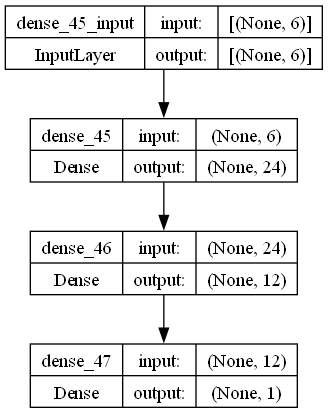

In [33]:
from tensorflow.keras.utils import plot_model

# Define the FNN model
model = Sequential()
model.add(Dense(24, input_dim=X_train.shape[1], activation='relu'))  # Input layer with 24 neurons and ReLU activation.
model.add(Dense(12, activation='relu'))  # Hidden layer with 12 neurons and ReLU activation.
model.add(Dense(1, activation='sigmoid'))  # Output layer with 1 neuron and sigmoid activation.

# Plot the model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

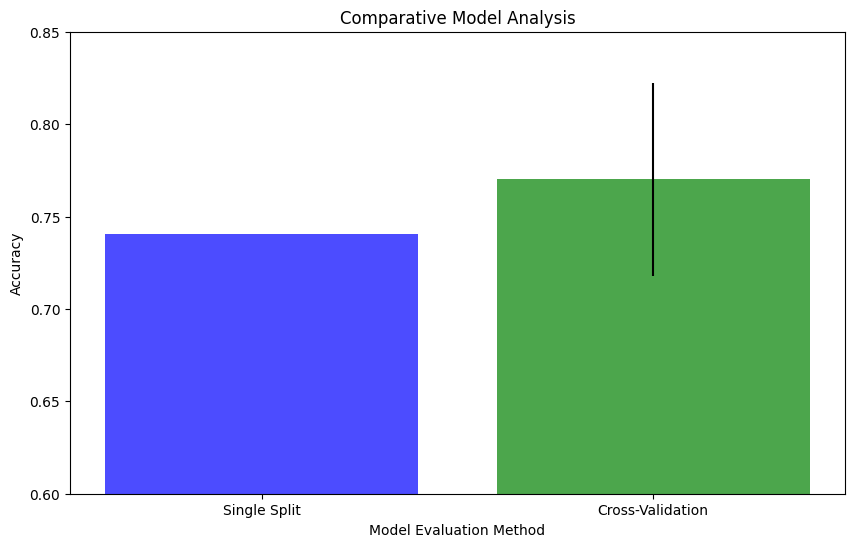

In [38]:
# Metrics from single train-test split and cross-validation;
single_split_accuracy = 0.7403
cross_val_mean_accuracy = 0.7702
cross_val_std_accuracy = 0.0523

labels = ['Single Split', 'Cross-Validation']
accuracies = [single_split_accuracy, cross_val_mean_accuracy]
errors = [0, cross_val_std_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(labels, accuracies, yerr=errors, color=['blue', 'green'], alpha=0.7)
plt.xlabel('Model Evaluation Method')
plt.ylabel('Accuracy')
plt.title('Comparative Model Analysis')
plt.ylim(0.6, 0.85)
plt.show()

## Predictive Analysis

Using our trained model, we can predict the likelihood of diabetes for new patients. For instance, given a new patient's medical data, the model can output a probability score. A higher score indicates a higher risk of diabetes.

### Dummy Data:
Let's create a synthetic patient data based on the range and characteristics of the features in the original dataset.

In [39]:
# Sample new patient data:
glucose = np.random.randint(70, 200)  # Random glucose level between 70 and 200.
bmi = np.random.uniform(15, 50)       # Random BMI between 15 and 50.
insulin = np.random.randint(0, 300)   # Random insulin level between 0 and 300.

# Randomly select an age category:
age_categories = np.zeros(3)
random_age_category = np.random.choice([0, 1, 2])
age_categories[random_age_category] = 1

# Mapping index to age category for display:
age_category_mapping = {0: "Young", 1: "Middle-aged", 2: "Senior"}

# Display the generated patient data:
print(f"Sample Patient Data:")
print(f"Glucose: {glucose}")
print(f"BMI: {bmi:.2f}")
print(f"Insulin: {insulin}")
print(f"Age Category: {age_category_mapping[random_age_category]}")

new_patient_data = np.array([[glucose, bmi, insulin] + list(age_categories)])

# Predict the likelihood of diabetes:
predicted_probability = model.predict(new_patient_data)
print(f"\nPredicted probability of diabetes for the new patient: {predicted_probability[0][0]:.2f}")

Sample Patient Data:
Glucose: 153
BMI: 45.77
Insulin: 104
Age Category: Senior
1/1 [==============================] - 0s 29ms/step

Predicted probability of diabetes for the new patient: 0.00


In [40]:
# Function:
def generate_patient_data():
    glucose = np.random.randint(70, 200) 
    bmi = np.random.uniform(15, 50)       
    insulin = np.random.randint(0, 300)  
    
    age_categories = np.zeros(3)
    random_age_category = np.random.choice([0, 1, 2])
    age_categories[random_age_category] = 1

    age_category_mapping = {0: "Young", 1: "Middle-aged", 2: "Senior"}

    print(f"Sample Patient Data:")
    print(f"Glucose: {glucose}")
    print(f"BMI: {bmi:.2f}")
    print(f"Insulin: {insulin}")
    print(f"Age Category: {age_category_mapping[random_age_category]}")

    return np.array([[glucose, bmi, insulin] + list(age_categories)])

# Loop to generate and predict for 10 synthetic patients:
for i in range(10):
    print(f"\nPatient {i+1}:")
    new_patient_data = generate_patient_data()
    predicted_probability = model.predict(new_patient_data)
    print(f"Predicted probability of diabetes: {predicted_probability[0][0]:.2f}\n")
    print("-" * 50)


Patient 1:
Sample Patient Data:
Glucose: 162
BMI: 48.59
Insulin: 249
Age Category: Young
1/1 [==============================] - 0s 24ms/step
Predicted probability of diabetes: 0.00

--------------------------------------------------

Patient 2:
Sample Patient Data:
Glucose: 121
BMI: 38.91
Insulin: 208
Age Category: Young
1/1 [==============================] - 0s 30ms/step
Predicted probability of diabetes: 0.00

--------------------------------------------------

Patient 3:
Sample Patient Data:
Glucose: 186
BMI: 20.17
Insulin: 90
Age Category: Middle-aged
1/1 [==============================] - 0s 31ms/step
Predicted probability of diabetes: 0.00

--------------------------------------------------

Patient 4:
Sample Patient Data:
Glucose: 102
BMI: 27.79
Insulin: 186
Age Category: Senior
1/1 [==============================] - 0s 28ms/step
Predicted probability of diabetes: 0.00

--------------------------------------------------

Patient 5:
Sample Patient Data:
Glucose: 149
BMI: 16.76
I

<div class="alert alert-block alert-danger">
The model consistently predicts a low probability of diabetes for most patients, indicating that it might be biased or overly confident. This could be due for many reasons: model bias, the randomly generated synthethic data might not be representative, the model is not complex enough or it hasn't been trained sufficiently.
</div>

# Insights and Recommendations
<div class="alert alert-block alert-success">
In our quest to understand the potential of neural networks in predicting diabetes outcomes based on medical predictor variables, we embarked on a comprehensive analysis of a dataset containing medical records of individuals

Our analysis began with an exploration of the dataset. We visualized the distributions of various features, identified potential outliers, and addressed missing/implausible values. We then employed statistical tests, including the z-test and the t-test for identifying correlations, to derive insights from the data.

The core of our analysis was the development of a Feedforward Neural Network (FNN). This artificial neural network, characterized by its unidirectional data flow, was trained using features like Glucose, BMI, Insulin, and Age Categories. We evaluated the model's performance using various metrics, including accuracy, precision, recall, and the F1 score.

We identified potential data quality issues, such as implausible zero values for Insulin and SkinThickness. These were addressed using median imputation, though more sophisticated methods could be explored in future analyses.  Scatter plots revealed correlations between features like age and blood pressure, as well as BMI and blood pressure. However, these correlations did not distinctly separate diabetic and non-diabetic individuals.

Our FNN achieved an average accuracy of approximately 77% through cross-validation. While promising, the model exhibited some bias, often predicting a low probability of diabetes for most patients. There's always a possibility that a more complex architecture or additional training could yield better results. Though we attempted to optimize the model's hyperparameters, the improvements were inconsistent across trials, suggesting the model might already be near its optimal performance for the given data.

Some recommendaations include:
- Consider collecting more comprehensive and accurate data, especially for features with potential inaccuracies like Insulin and SkinThickness.
- Explore more complex neural network architectures or ensemble methods to improve prediction accuracy.
- We could employed other techniques to address class imbalances and potential model bias.

The Feedforward Neural Network employed in this study, show promise in predicting diabetes outcomes based on medical predictor variables. While our model achieved a commendable accuracy, there's room for improvement, both in terms of data quality and model complexity. Also, it's crucial to remember that collaboration between data scientists and medical professionals is key to ensuring the relevance and applicability of our findings.
</div>